In [1]:
from pyplotutil import *

In [2]:
#Model Input Variables
#measured sample decay factor (mock)
a = -0.03
stddev=0.006
#number of standard deviations for upper and lowers
n=2
#x axis length
userage = range(1, 200)

#adjusts variability in the test data
max_shift_percent = 0.38642

In [3]:
##THIS BLOCK HOLDS THE BASE SAMPLE DATA
import matplotlib.pyplot as plt
import math

a_max = a + stddev * n
a_min = a - stddev * n


keys = list(userage)
indices = [n-1 for n in userage]

inputs = {
    'samplerev' : a,
    'upper_band' : a_max,
    'lower_band' : a_min
}

datasets = {}
for key, value in inputs.items():
    data = exp_list(userage, value)
    norm_data = norm(data)
    datasets.update({
        key: {
            'data':data,
            'norm':norm_data,
            'norm_cumulative':cumulative(norm_data),
            'cumulative':cumulative(data)
        }
    })

samplerev = [math.exp(a*x) for x in userage]
adj_sample_upper = [math.exp(a_max*x) for x in userage]
adj_sample_lower = [math.exp(a_min*x) for x in userage]

normrev_upper = norm(adj_sample_upper)
normrev_lower = norm(adj_sample_lower)
normrev = norm(samplerev)

norm_cumulative = [ sum(normrev[0:x]) for x in indices ]
list(datasets.keys())

['samplerev', 'upper_band', 'lower_band']

In [4]:
##RANDOM FACTORS FOR GENERATION OF TEST DATA
import random
random.seed()

rand_factor_sets = [
    'A',
    'B',
    'C',
    'D'
]
rand_factors = {}
for key in rand_factor_sets:
    data = [1- 2*max_shift_percent* ( random.random() - .5 ) for x in userage]
    rand_factors.update({
        key : data
    })
list(rand_factors.keys())

['D', 'B', 'C', 'A']

In [5]:
##INSTANTIATE TEST DATA
test_data = {}
for key, factorlist in rand_factors.items():
    data = [
        samplerev[i] * factorlist[i]
        for i in indices
    ]
    c_data = cumulative(data)
    project_upper = [d / c for d, c in zip(c_data, datasets['upper_band']['norm_cumulative'])]
    project_lower = [d / c for d, c in zip(c_data, datasets['lower_band']['norm_cumulative'])]
    project_average = [d / c for d, c in zip(c_data, datasets['samplerev']['norm_cumulative'])]
    total = sum(data)
    
    test_data.update({
        key : {
            'data' : data,
            'cumulative' : c_data,
            'project_upper' : project_upper,
            'error_upper' : projection_error(project_upper, total),
            'project_lower' : project_lower,
            'error_lower' : projection_error(project_lower, total),
            'project_average' : project_average,
            'error_average' : projection_error(project_average, total)
        }
    })
    
test_dataset_keys = list(test_data.keys())

In [6]:
datasets['samplerev'].keys()

dict_keys(['cumulative', 'norm', 'norm_cumulative', 'data'])

In [7]:
test_dataset_keys

['A', 'D', 'B', 'C']

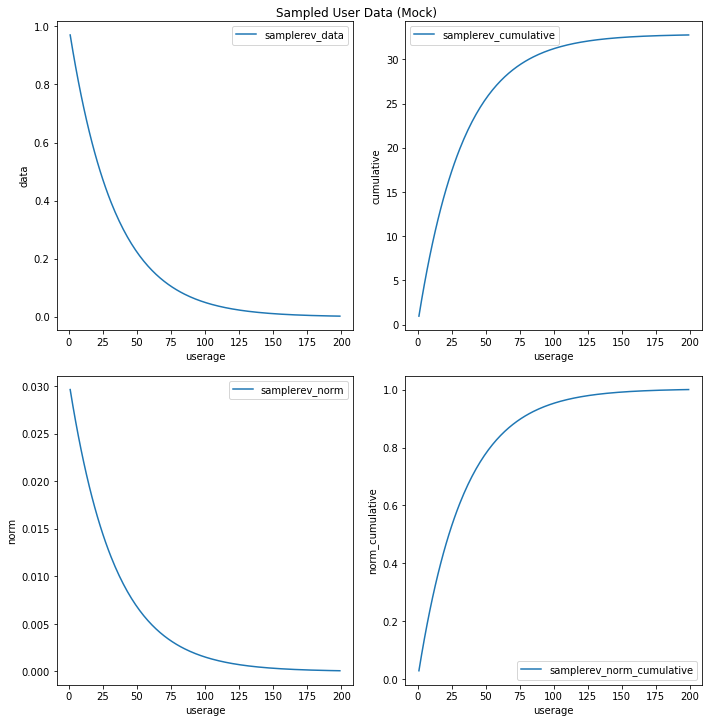

In [8]:
make_subplot_set_with_loopmode(
    datasets,
    ['samplerev'],
    ['data', 'cumulative', 'norm', 'norm_cumulative'],
    userage,
    'userage',
    title='Sampled User Data (Mock)',
    loopmode='metric'
)

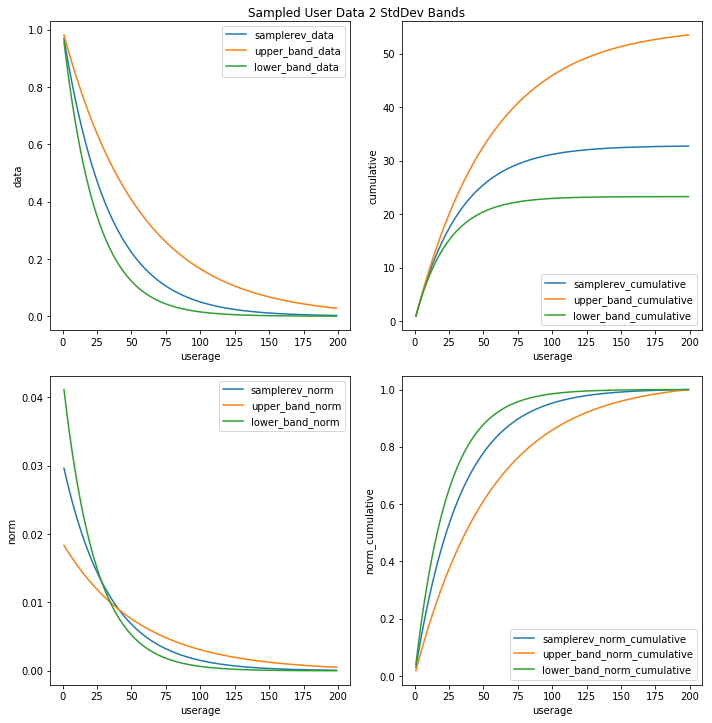

In [9]:
make_subplot_set_with_loopmode(
    datasets,
    ['samplerev', 'upper_band', 'lower_band'],
    ['data', 'cumulative', 'norm', 'norm_cumulative'],
    userage,
    'userage',
    title="Sampled User Data {n} StdDev Bands".format(n=n),
    loopmode='metric'
)

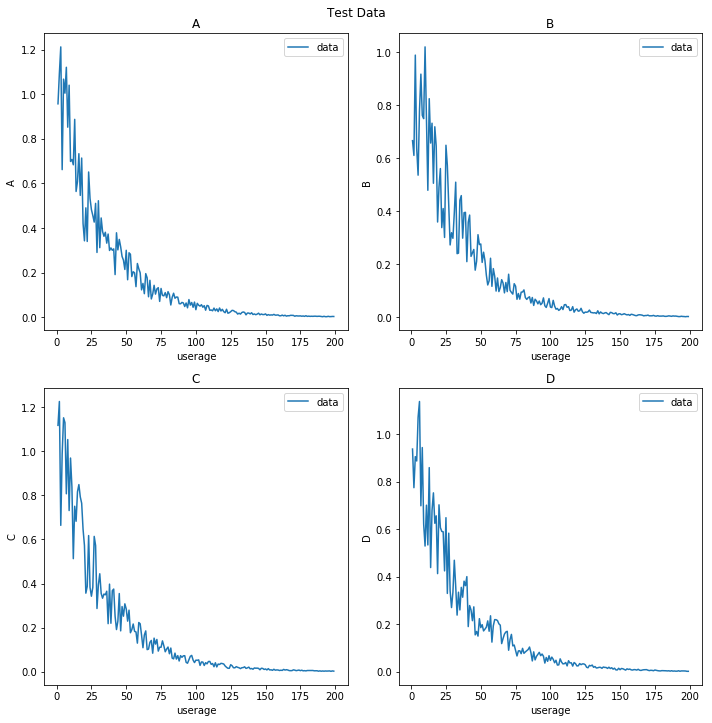

In [10]:
make_subplot_set_with_loopmode(
    test_data,
    ['A', 'B', 'C', 'D'],
    ['data'],
    userage,
    'userage',
    title = 'Test Data',
    loopmode = 'sample',
    rows = 2,
    columns = 2
)

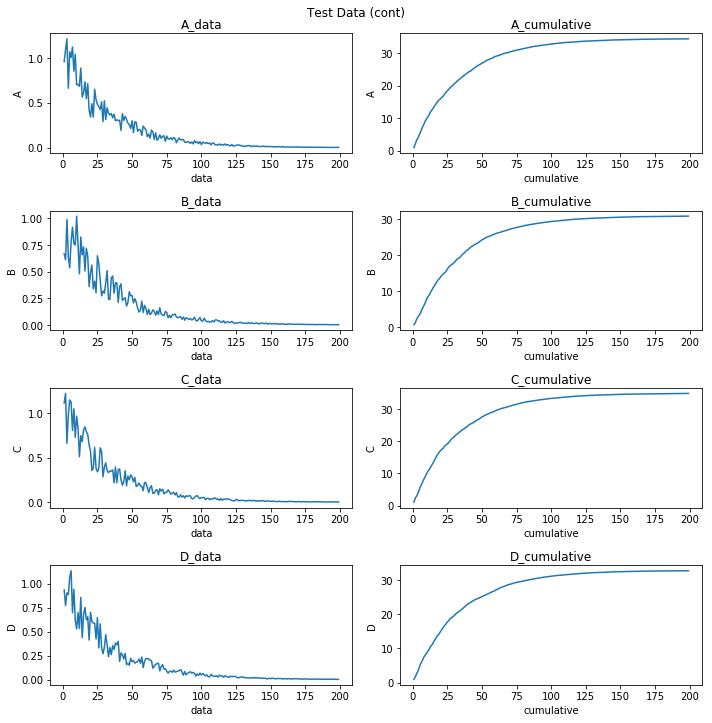

In [11]:
make_subplot_set_with_loopmode(
    test_data,
    ['A', 'B', 'C', 'D'],
    ['data', 'cumulative'],
    userage,
    'userage',
    title = 'Test Data (cont)',
    loopmode = 'cross',
    rows = 4,
    columns = 2
)

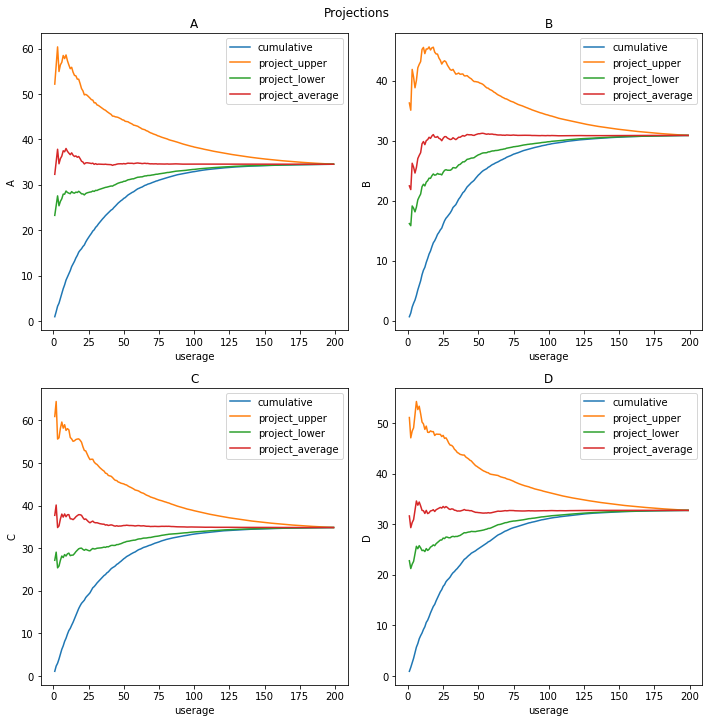

In [12]:
make_subplot_set(
    test_data,
    ['A', 'B', 'C', 'D'],
    ['cumulative', 'project_upper', 'project_lower', 'project_average'],
    userage,
    'userage',
    title = 'Projections'
)

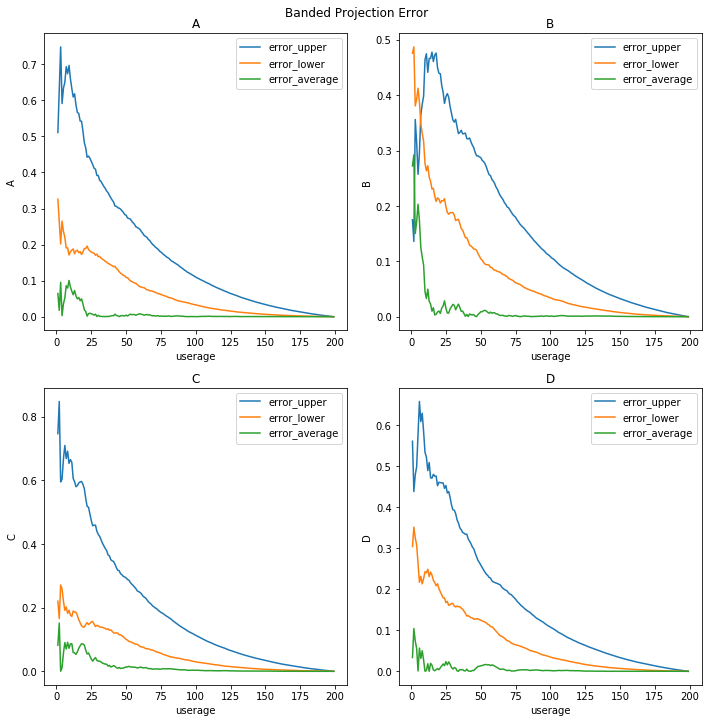

In [13]:
make_subplot_set(
    test_data,
    ['A', 'B', 'C', 'D'],
    ['error_upper', 'error_lower', 'error_average'],
    userage,
    'userage',
    title = 'Banded Projection Error'
)

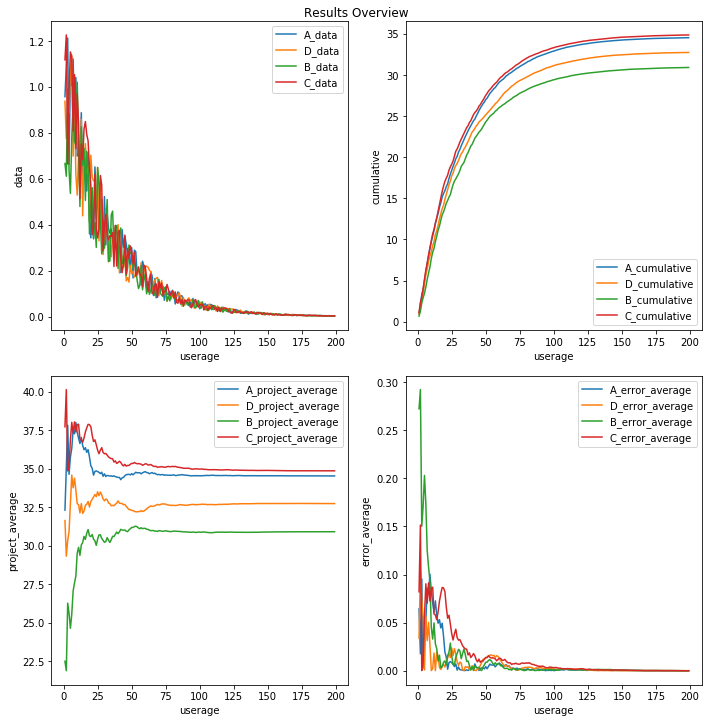

In [14]:
make_subplots(
    test_data,
    ['data', 'cumulative', 'project_average', 'error_average'],
    userage,
    'userage',
    title = 'Results Overview'
)

In [15]:
#calculate error stats
#A-D
for setkey, setdata in test_data.items():
    for curvekey in ['error_average', 'error_upper', 'error_lower']:
        length = len(setdata[curvekey])
        print(setkey, 'max_{curvekey}_after_index'.format(curvekey=curvekey))
        setdata['max_{curvekey}_after_index'.format(curvekey=curvekey)] = [max(setdata[curvekey][i:length]) for i in indices]

A max_error_average_after_index
A max_error_upper_after_index
A max_error_lower_after_index
D max_error_average_after_index
D max_error_upper_after_index
D max_error_lower_after_index
B max_error_average_after_index
B max_error_upper_after_index
B max_error_lower_after_index
C max_error_average_after_index
C max_error_upper_after_index
C max_error_lower_after_index


In [16]:
for setkey, setdata in test_data.items():
    for curvekey in ['error_average', 'error_upper', 'error_lower']:
        print("max error after 10 for {setkey}, {curvekey}: {data}".format(setkey=setkey, curvekey=curvekey, data = max(setdata[curvekey][10:])))

max error after 10 for A, error_average: 0.07260827806261097
max error after 10 for A, error_upper: 0.6332241661319523
max error after 10 for A, error_lower: 0.1957608083232596
max error after 10 for D, error_average: 0.023535147279657487
max error after 10 for D, error_upper: 0.5219701713615449
max error after 10 for D, error_lower: 0.24866927605041478
max error after 10 for B, error_average: 0.0497318954968749
max error after 10 for B, error_upper: 0.4777718215394806
max error after 10 for B, error_lower: 0.2726357480593755
max error after 10 for C, error_average: 0.08686989536513502
max error after 10 for C, error_upper: 0.6576006344763368
max error after 10 for C, error_lower: 0.1894012448380021


In [17]:
test_data['A'].keys()

dict_keys(['max_error_average_after_index', 'error_upper', 'error_lower', 'project_average', 'data', 'cumulative', 'project_lower', 'error_average', 'project_upper', 'max_error_lower_after_index', 'max_error_upper_after_index'])